In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Create the value object
* it will have operations like add, mul
* it will store data, link to previous nodes, operation for this node and grad value which is gradient of this node

In [92]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self) -> str:
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

In [34]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
a + b
a.__add__(b)

Value(data=-1.0)

In [35]:
c = Value(10.0, label='c')
d = a*b + c
d


Value(data=4.0)

In [36]:
print(d._prev)
print(d._op)

{Value(data=10.0), Value(data=-6.0)}
+


In [37]:
e = a*b; e.label = 'e'
d = e + c ; d.label = 'd'
f = Value(-2.0, label='f')
L = d*f; L.label = 'L'
L

Value(data=-8.0)

In [93]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    # dot.node(name = uid, label = "{ %s | data %.4f }" % (n.label, n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)
  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

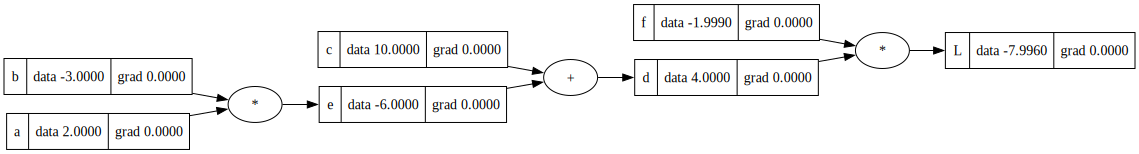

In [68]:
draw_dot(L)

In [94]:
L.grad = 1.0

In [95]:
h = 0.001

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c ; d.label = 'd'
f = Value(-2.0, label='f')
L = d*f; L.label = 'L'
L1 = L.data

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c ; d.label = 'd'
f = Value(-2.0, label='f')
L = d*f; L.label = 'L'
L2 = L.data

print((L2 - L1)/h)

0.0


chaging `f` by h and calculating gradient DL/df

In [96]:
d = e + c ; d.label = 'd'
# d.data += h
f = Value(-2.0 + h, label='f')
L = d*f; L.label = 'L'
L2 = L.data

print((L2 - L1)/h)

3.9999999999995595


In [102]:
f.grad = 4.0

chaging `d` by h and calculating gradient DL/dd

In [98]:
d = e + c ; d.label = 'd'
d.data += h
f = Value(-2.0, label='f')
L = d*f; L.label = 'L'
L2 = L.data

print((L2 - L1)/h)

-2.000000000000668


In [99]:
d.grad = -2.0

printing the graph

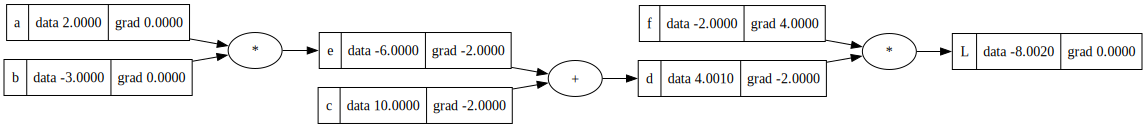

In [103]:
draw_dot(L)

calculating derivative of c, e

dd/dc = ?

d = c + e
using, (f(x + h) - f(x))/h
dd/dc => ((c+h + e) - (c + e))/h
      => (c + h + e - c - e)/h
      => h/h = 1.0

similarly, for dd/de
    = 1.0


by chain rule,
dL/dc = (dL/dd) * (dd/dc)
=> DL/dc = -2.0 * 1.0 = -2.0
=> DL/de = -2.0

In [100]:
c.grad = -2.0
e.grad = -2.0

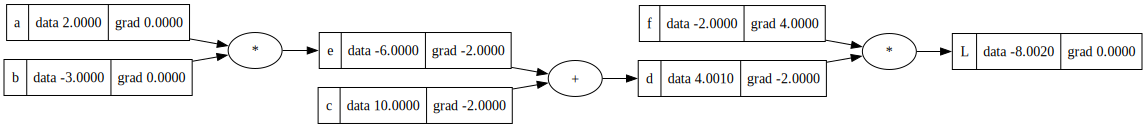

In [104]:
draw_dot(L)

In [105]:
h = 0.001

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c ; d.label = 'd'
f = Value(-2.0, label='f')
L = d*f; L.label = 'L'
L1 = L.data

a = Value(2.0, label='a')
b = Value(-3.0, label='b')

# incrementing c + h
c = Value(10.0 + h, label='c')
e = a*b; e.label = 'e'
d = e + c ; d.label = 'd'
f = Value(-2.0, label='f')
L = d*f; L.label = 'L'
L2 = L.data

print((L2 - L1)/h)

c = Value(10.0, label='c')
e = a*b; e.label = 'e'
e.data += h
d = e + c ; d.label = 'd'
f = Value(-2.0, label='f')
L = d*f; L.label = 'L'
L2 = L.data

print((L2 - L1)/h)

-1.9999999999988916
-2.000000000000668


calculating derivative of a, b

e = a * b
de/da = b (as we have calculated earlier)

by chain rule,
dL/da = dL/de * de/da
=> -2.0 * -3.0

dL/db = DL/de * de/db
=> -2.0 * 2.0

In [106]:
a.grad = -2.0 * -3.0
b.grad =  -2.0 * 2.0

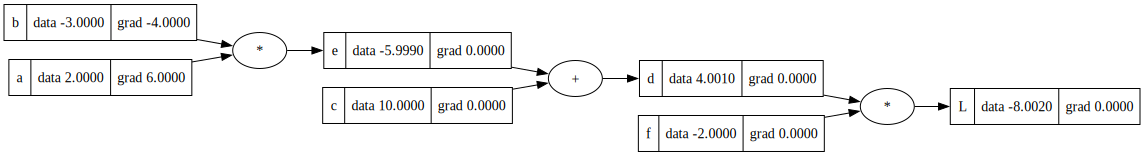

In [107]:
draw_dot(L)

In [90]:
# verifying this

a = Value(2.0 + h, label='a')
b = Value(-3.0, label='b')

c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c ; d.label = 'd'
f = Value(-2.0, label='f')
L = d*f; L.label = 'L'
L2 = L.data

print((L2 - L1)/h)

a = Value(2.0, label='a')
b = Value(-3.0 + h, label='b')

c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c ; d.label = 'd'
f = Value(-2.0, label='f')
L = d*f; L.label = 'L'
L2 = L.data

print((L2 - L1)/h)

6.000000000000227
-3.9999999999995595


In [108]:
# setting all grad values

f.grad = 4.0
d.grad = -2.0
c.grad = -2.0
e.grad = -2.0
a.grad = -2.0 * -3.0
b.grad =  -2.0 * 2.0

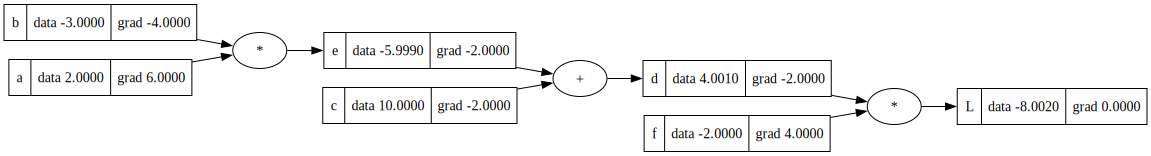

In [109]:
draw_dot(L)

In [114]:
# if we nudge values in direction of grad, we should nudge L up

print(L.data)

h = 0.01
a.data += h * a.grad
b.grad += h * b.grad
c.grad += h * c.grad
f.grad += h * f.grad

e = a * b
d = e + c
L = d * f

print(L.data)

-6.559999999999999
-6.199999999999999


backpropagation though a neuron

![neuron structure](assets/neuron_model.jpg)

f -> activation function like tanh or sigmoid

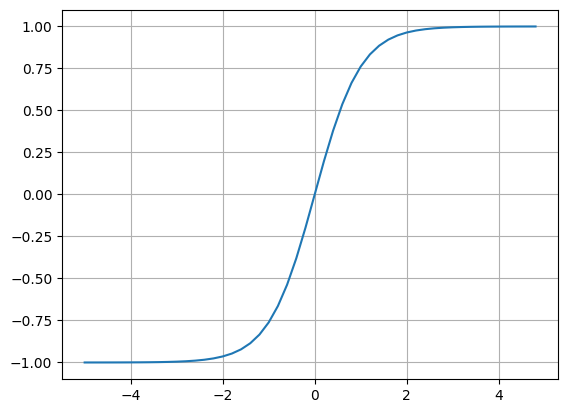

In [115]:
# numpy tanh function
plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5, 5, 0.2))); plt.grid();

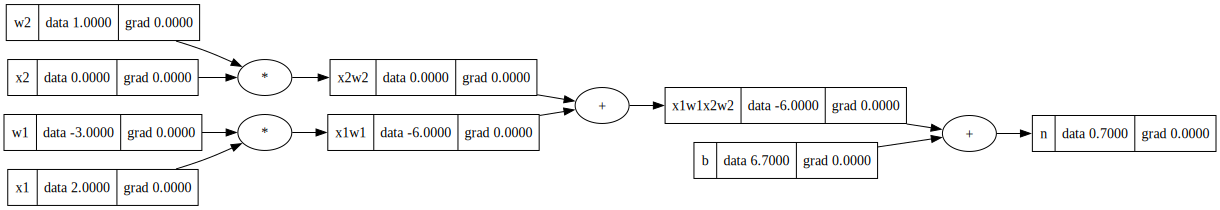

In [116]:
# inputs x1, x2 
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

#weights
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

#bias if the neuron
b = Value(6.7, label='b')

#x1w1 + x2w2 + b
x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2 = x2*w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1x2w2'
n = x1w1x2w2 + b; n.label = 'n'

draw_dot(n)

In [121]:
# define tanh funtion for Value
def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self,), 'tanh')
    return out

Value.tanh = tanh

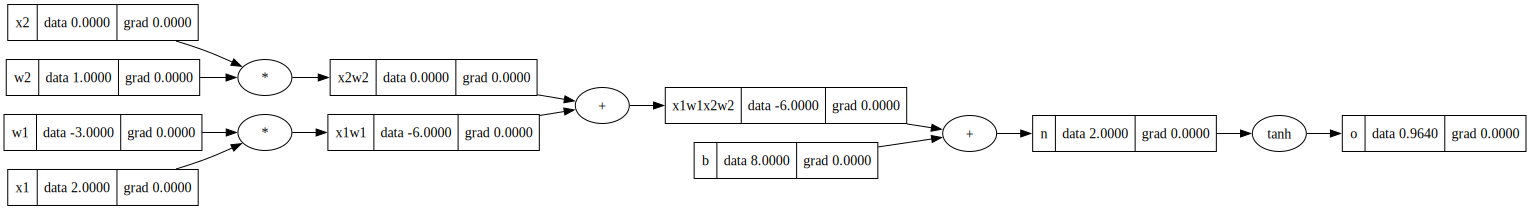

In [126]:
o = n.tanh(); o.label = 'o'

draw_dot(o)

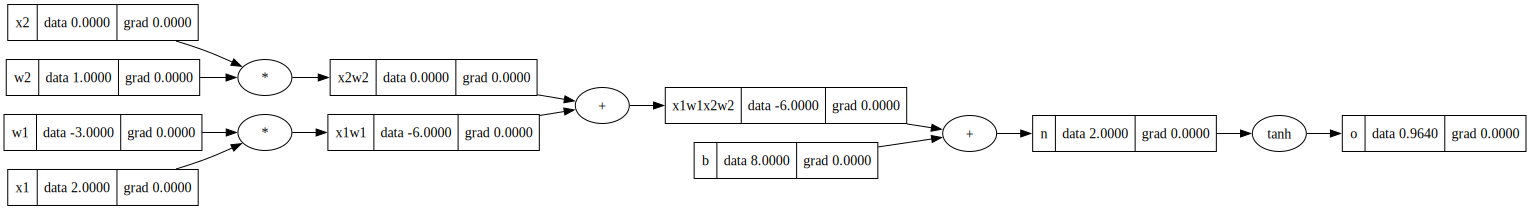

In [125]:
# increasing bias
b = Value(8, label='b')

# x1w1 + x2w2 + b (here just updating for changed b)
n = x1w1x2w2 + b; n.label = 'n'

o = n.tanh(); o.label = 'o'

draw_dot(o)

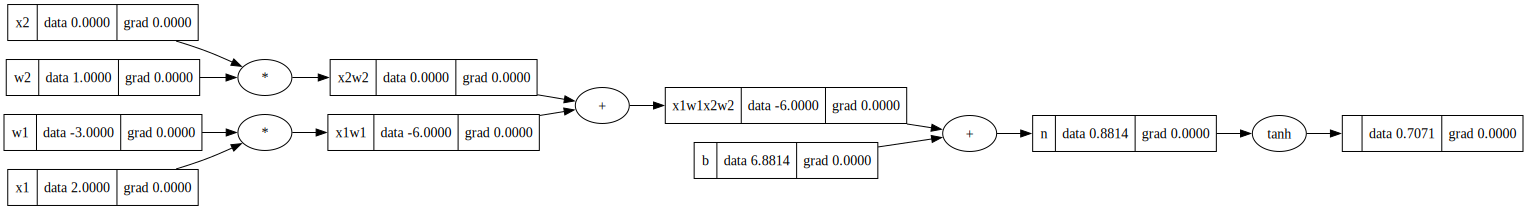

In [127]:
# increasing bias
b = Value(6.8813735870195432, label='b')

# x1w1 + x2w2 + b (here just updating for changed b)
n = x1w1x2w2 + b; n.label = 'n'

o = n.tanh()

draw_dot(o)

In [ ]:
o.grad = 1.0

o = tanh(n)

do/dn = ?

from derivatives, d(tanhx)/dx = 1 - tanh^2(x) = sech^2(x) = 1/cosh^2(x)
s0, do/dn = 1- tanh(n)**2 = 1 - o**2 (1- o^2)


In [128]:
n.grad = o.data**2

In [130]:
# + (plus) operation results in flow (distribution) of gradient from previous example
# that is, n.grad = 0.5
x1w1x2w2.grad = 0.5
b.grad = 0.5

# same for next + operation
x1w1.grad = 0.5
x2w2.grad = 0.5

In [136]:
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

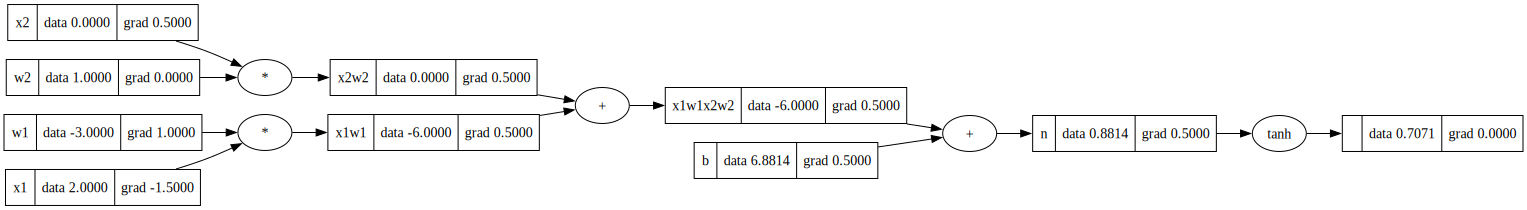

In [138]:
draw_dot(o)

Lets start automating backpropagation

In [149]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label
        # add backward function
        self._backward = lambda: None

    def __repr__(self) -> str:
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        
        out._backward = _backward
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        
        out._backward = _backward
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self,), 'tanh')

        def _backward():
            self.grad = (1 - t**2) * out.grad
        
        out._backward = _backward
        return out



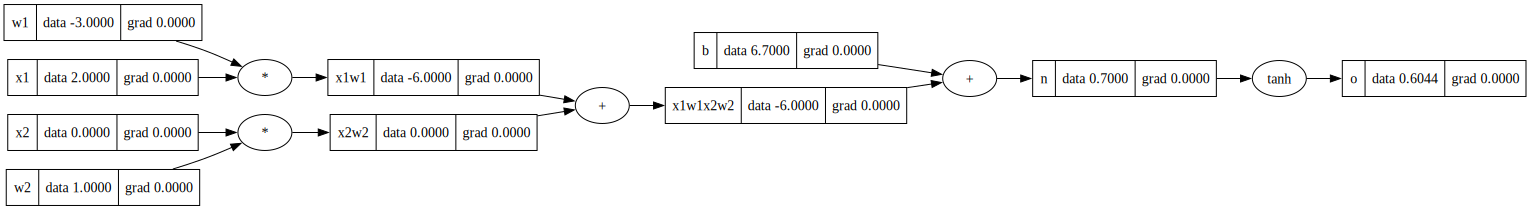

In [150]:
# inputs x1, x2 
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

#weights
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

#bias if the neuron
b = Value(6.7, label='b')

#x1w1 + x2w2 + b
x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2 = x2*w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1x2w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

draw_dot(o)

In [142]:
o.grad = 1.0
o._backward()

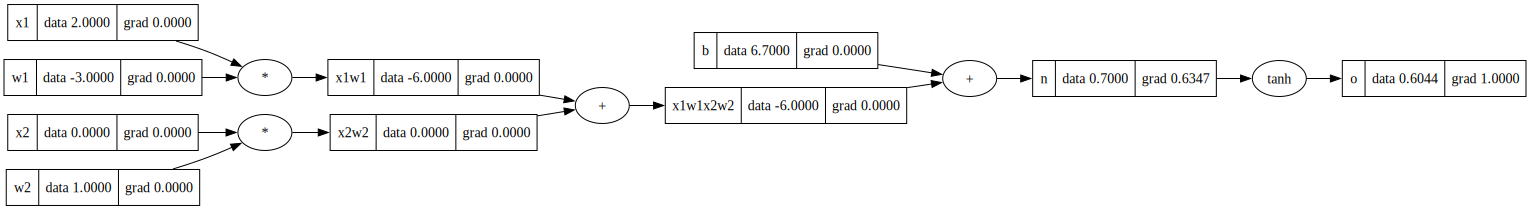

In [143]:
draw_dot(o)

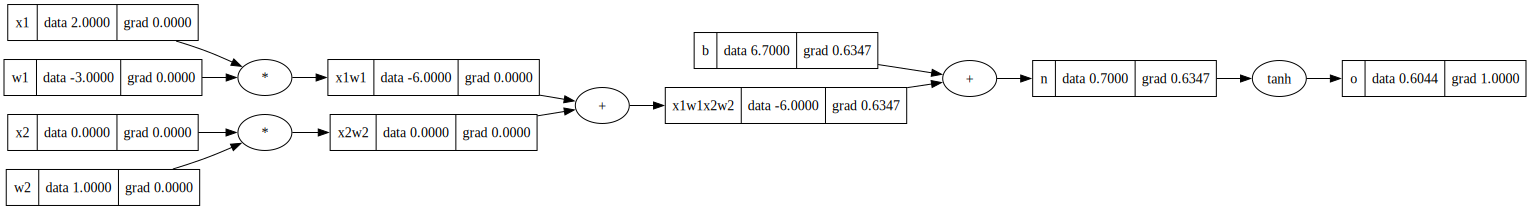

In [145]:
n._backward()
draw_dot(o)

In [151]:
# instead of calling backward, we can see auto call _backward() in topological short order

def backward(self):

    # topological order all of the children in the graph
    topo = []
    visited = set()
    def build_topo(v):
        if v not in visited:
            visited.add(v)
            for child in v._prev:
                build_topo(child)
            topo.append(v)
    build_topo(self)

    # go one variable at a time and apply the chain rule to get its gradient
    self.grad = 1
    for v in reversed(topo):
        v._backward()

Value.backward = backward

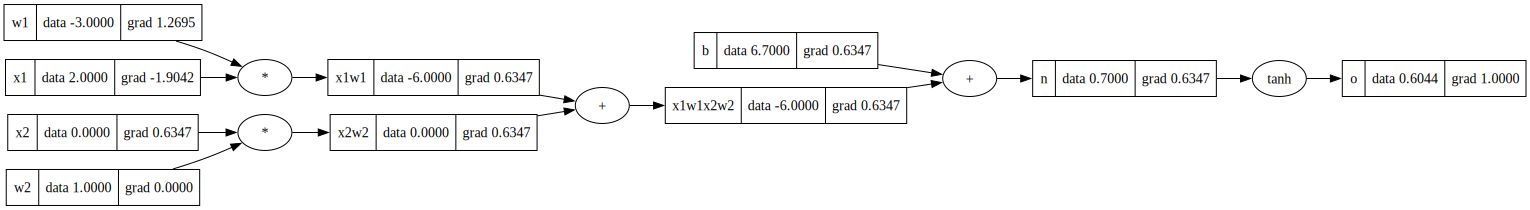

In [152]:
# now, calling backward() should compute grad for all nodes processed

o.backward()
draw_dot(o)